In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/phase-2-sentiment-analysis/df_cleaned1.csv


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
from textblob import TextBlob

pd.set_option('display.max_columns' , 500)
pd.set_option('display.width' , 1000)

In [7]:
df = pd.read_csv('/kaggle/input/phase-2-sentiment-analysis/df_cleaned1.csv')
df.head(3)

,date_review,location,job_title,tenure,Current Employee,headline,pros,cons,recommend,ceo_approv,outlook,overall_rating,work_life_balance,culture_values,diversity_inclusion,career_opp,comp_benefits,senior_mgmt
0,2008-01-31,"Cupertino, CA",Senior Product Manager,NaN,1.0,We make products that poeple enjoy buying and ...,The people we work with are great and I can't ...,You have to be careful because this job can ta...,1,1,0,5,3.0,NaN,NaN,3.0,4.0,4.0
1,2008-02-05,"Mountain View, CA",Software Engineer,NaN,1.0,Freedom within the company and lots of things ...,I work w/ a diverse set of people. You have ha...,Google can be a bit overwhelming w/ the volume...,1,1,0,4,4.0,NaN,NaN,4.0,4.0,4.0
2,2008-02-11,"Mountain View, CA",Software Engineer,NaN,1.0,Work with smart people who are willing to shar...,People are willing to share knowledge which is...,A company like this requires a lot of long hou...,1,1,0,5,4.0,NaN,NaN,5.0,5.0,5.0


In [8]:
def sen_analysis(row):
    if not pd.isna(row['headline']):
        row['s_polarity'] =  TextBlob(row['headline']).sentiment.polarity
        row['s_subjectivity'] = TextBlob(row['headline']).sentiment.subjectivity
    else:
        row['s_polarity'] = np.NaN
        row['s_subjectivity'] = np.NaN
    
    return row
df_new = df.apply(sen_analysis , axis = 1)

df_new[['headline' , 's_polarity' , 's_subjectivity']]

,headline,s_polarity,s_subjectivity
0,We make products that poeple enjoy buying and ...,0.400000,0.500000
1,Freedom within the company and lots of things ...,0.000000,0.000000
2,Work with smart people who are willing to shar...,0.232143,0.696429
3,It is a different job because of all of the di...,0.166667,0.733333
4,One of the best jobs of my life because I work...,0.600000,0.516667
...,...,...,...
805046,------,0.000000,0.000000
805047,Pay,0.000000,0.000000
805048,Nice work,0.600000,1.000000
805049,Good place to work,0.700000,0.600000


In [9]:
df_new.head()

,date_review,location,job_title,tenure,Current Employee,headline,pros,cons,recommend,ceo_approv,outlook,overall_rating,work_life_balance,culture_values,diversity_inclusion,career_opp,comp_benefits,senior_mgmt,s_polarity,s_subjectivity
0,2008-01-31,"Cupertino, CA",Senior Product Manager,NaN,1.0,We make products that poeple enjoy buying and ...,The people we work with are great and I can't ...,You have to be careful because this job can ta...,1,1,0,5,3.0,NaN,NaN,3.0,4.0,4.0,0.400000,0.500000
1,2008-02-05,"Mountain View, CA",Software Engineer,NaN,1.0,Freedom within the company and lots of things ...,I work w/ a diverse set of people. You have ha...,Google can be a bit overwhelming w/ the volume...,1,1,0,4,4.0,NaN,NaN,4.0,4.0,4.0,0.000000,0.000000
2,2008-02-11,"Mountain View, CA",Software Engineer,NaN,1.0,Work with smart people who are willing to shar...,People are willing to share knowledge which is...,A company like this requires a lot of long hou...,1,1,0,5,4.0,NaN,NaN,5.0,5.0,5.0,0.232143,0.696429
3,2008-02-14,"Cupertino, CA",Software Engineer,NaN,1.0,It is a different job because of all of the di...,The big positive for me is that I really do en...,I suppose that a con would be that there is a ...,1,1,0,4,4.0,NaN,NaN,3.0,4.0,3.0,0.166667,0.733333
4,2008-02-14,"Mountain View, CA",Software Engineer,NaN,1.0,One of the best jobs of my life because I work...,"To repeat what I wrote before, the people I wo...",Sometimes being that it is such a big company ...,1,1,0,5,5.0,NaN,NaN,4.0,4.0,5.0,0.600000,0.516667


In [10]:
def plot_pol_vs_sub(pol,sub,col):
    fig,ax = plt.subplots(figsize = (10,5))
    plt.scatter(x = pol , y = sub , data = df_new , c= pol)
    plt.vlines(x = 0 , ymin = 0 , ymax = 1 , linestyle = 'dashed' , color = 'r')
    plt.title(f'{col} ploarity vs subjectivity')
    plt.ylabel('subjectivity')
    plt.xlabel('polarity')
    plt.xticks([-1,0,1] , ['negative' , 'neutral' , 'positive'])
    
    plt.show()


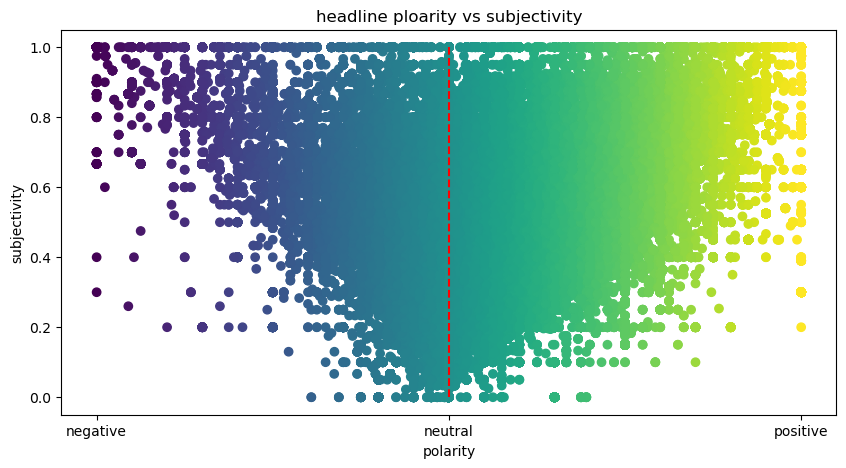

In [11]:
plot_pol_vs_sub('s_polarity' , 's_subjectivity' , 'headline')

**Findings:**

* It is clear that there are more positive comments than negative as we see more data points on the right side of the red vertical line. This verified what we have observed from the precious EDA.
* The more polarized the comment is (either positive or negative), the more subjective it is.
* We also notice that reviewers who give positive comments based more on facts (lower subjectivity) and reviewers who give negative comments based more on opinion.

**Plot Most Frequent 10 Job Titles' Sentiment in Summary**

In [12]:
df_new['job_title'] = df_new['job_title'].replace(' ' , ' unknown title')


In [13]:
top10 = df_new['job_title'].value_counts().nlargest(10)
top10

 Anonymous Employee    155836
 unknown title          75719
 Manager                14229
 Consultant             11762
 Software Engineer      10108
 Associate              10003
 Senior Consultant       9460
 Analyst                 9318
 Crew Member             7716
 Senior Associate        6469
Name: job_title, dtype: int64

In [14]:
top10_review = df_new.loc[df_new['job_title'].isin(top10.index) , ['job_title' , 's_polarity' , 's_subjectivity']]
top10_mean_review = top10_review.groupby('job_title')['s_polarity' , 's_subjectivity'].mean()

top10_mean_review

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,s_polarity,s_subjectivity
job_title,,
Analyst,0.331675,0.404024
Anonymous Employee,0.219163,0.298104
Associate,0.308760,0.401846
Consultant,0.341114,0.423779
Crew Member,0.181921,0.372357
Manager,0.308775,0.404031
Senior Associate,0.310604,0.392242
Senior Consultant,0.318598,0.407239
Software Engineer,0.393350,0.461254


In [15]:
# top10_review = df_new.groupby('job_title')['s_polarity' , 's_subjectivity'].mean()
#top10_review = top10_review.loc[top10.index]

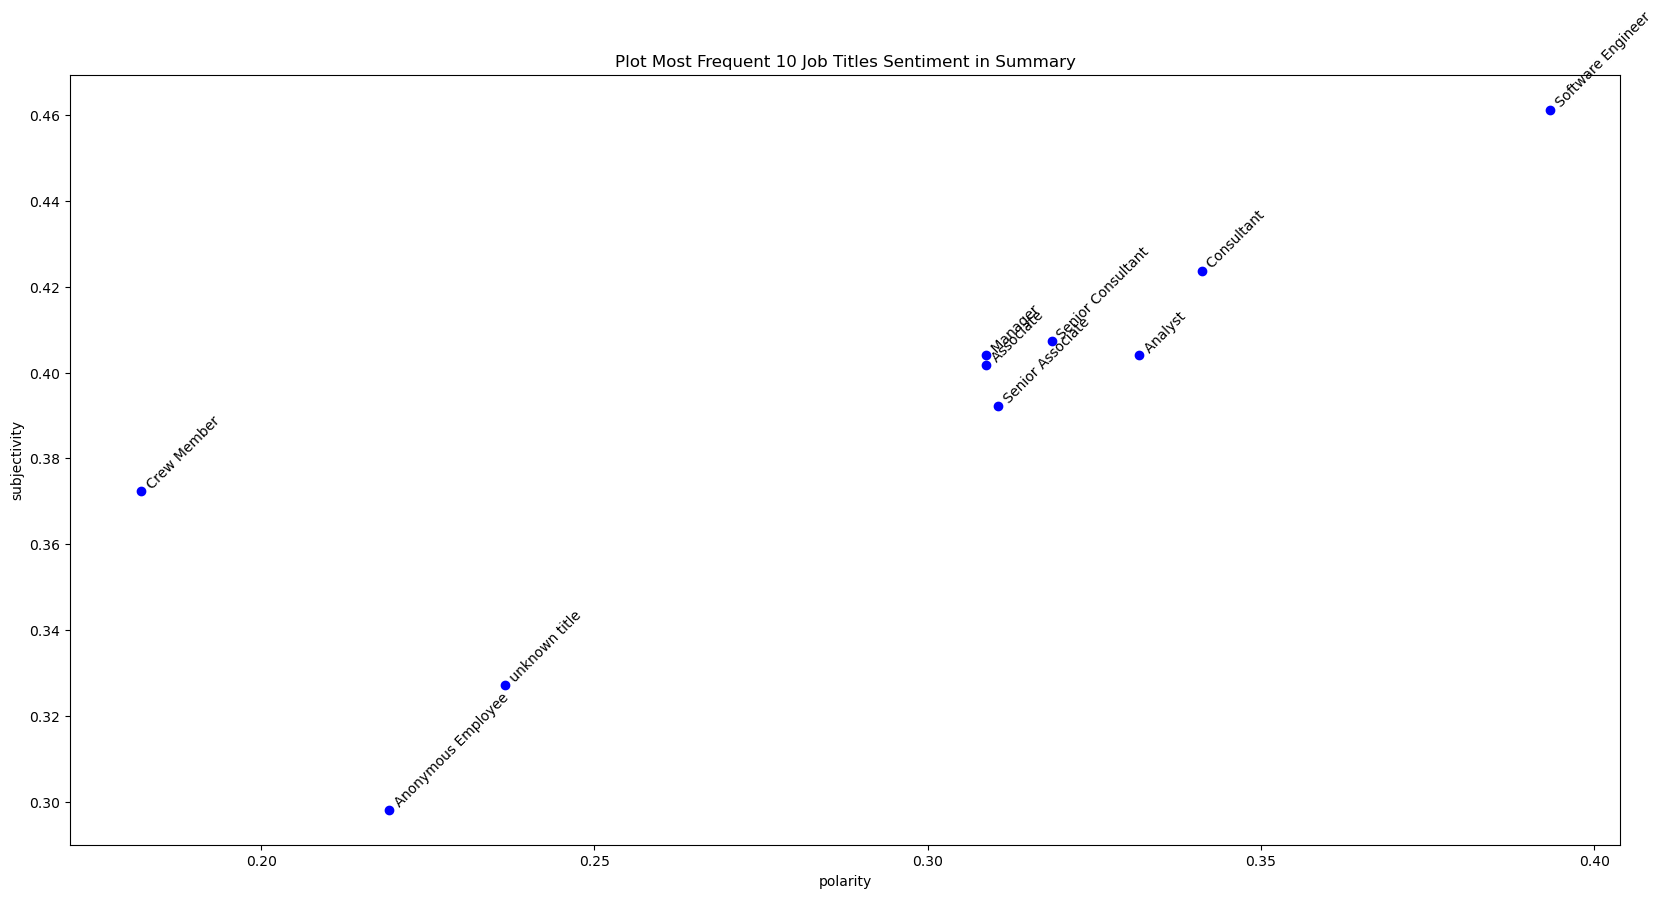

In [16]:
fig,ax = plt.subplots(figsize = (20,10))


for cnt , i in enumerate(top10_mean_review.index):
    y = top10_mean_review.loc[i , 's_subjectivity']
    x = top10_mean_review.loc[i , 's_polarity']
    plt.scatter(x,y,c = 'blue')
    plt.text(x,y,i,rotation = 45)
    
plt.title('Plot Most Frequent 10 Job Titles Sentiment in Summary')
plt.ylabel('subjectivity')
plt.xlabel('polarity')

plt.show()
    


**Findings:**

* Financial Representatives, Project Managers and reviewers who do not disclose their titles (Anonymous Employee) tend to give the most negative comments in 'Summary'. In the next section (keywords extraction and topic modeling), we will dive into these groups and see what makes them unhappy.
* System Analysts and Software Engineers have the most positive comments.

**Sentiment of Pro and Con Columns**

In [18]:
def sen_pro_con(row):
    
    if not pd.isna(row['pros']):
        row['p_polarity'] = TextBlob(row['pros']).sentiment.polarity
        row['p_subjectivity'] = TextBlob(row['pros']).sentiment.subjectivity
    else:
        row['p_polarity'] = np.NaN
        row['p_subjectivity'] = np.NaN
        
    if not pd.isna(row['cons']):
        row['c_polarity'] = TextBlob(row['cons']).sentiment.polarity
        row['c_subjectivity'] = TextBlob(row['cons']).sentiment.subjectivity
    else:
        row['c_polarity'] = np.NaN
        row['c_subjectivity'] = np.NaN
        
    return row

df_new = df_new.apply(sen_pro_con , axis=1)
df_new.head()

,date_review,location,job_title,tenure,Current Employee,headline,pros,cons,recommend,ceo_approv,outlook,overall_rating,work_life_balance,culture_values,diversity_inclusion,career_opp,comp_benefits,senior_mgmt,s_polarity,s_subjectivity,p_polarity,p_subjectivity,c_polarity,c_subjectivity
0,2008-01-31,"Cupertino, CA",Senior Product Manager,NaN,1.0,We make products that poeple enjoy buying and ...,The people we work with are great and I can't ...,You have to be careful because this job can ta...,1,1,0,5,3.0,NaN,NaN,3.0,4.0,4.0,0.400000,0.500000,0.800000,0.750000,-0.016667,1.000000
1,2008-02-05,"Mountain View, CA",Software Engineer,NaN,1.0,Freedom within the company and lots of things ...,I work w/ a diverse set of people. You have ha...,Google can be a bit overwhelming w/ the volume...,1,1,0,4,4.0,NaN,NaN,4.0,4.0,4.0,0.000000,0.000000,0.800000,0.750000,0.233333,0.441667
2,2008-02-11,"Mountain View, CA",Software Engineer,NaN,1.0,Work with smart people who are willing to shar...,People are willing to share knowledge which is...,A company like this requires a lot of long hou...,1,1,0,5,4.0,NaN,NaN,5.0,5.0,5.0,0.232143,0.696429,0.412500,0.620833,-0.170833,0.470833
3,2008-02-14,"Cupertino, CA",Software Engineer,NaN,1.0,It is a different job because of all of the di...,The big positive for me is that I really do en...,I suppose that a con would be that there is a ...,1,1,0,4,4.0,NaN,NaN,3.0,4.0,3.0,0.166667,0.733333,0.225455,0.444476,-0.379167,0.704167
4,2008-02-14,"Mountain View, CA",Software Engineer,NaN,1.0,One of the best jobs of my life because I work...,"To repeat what I wrote before, the people I wo...",Sometimes being that it is such a big company ...,1,1,0,5,5.0,NaN,NaN,4.0,4.0,5.0,0.600000,0.516667,0.389286,0.834524,-0.097222,0.380556


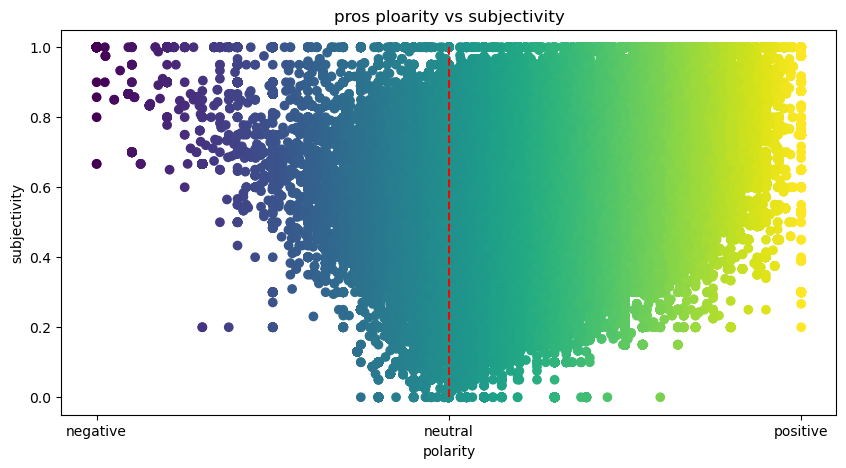

In [19]:
plot_pol_vs_sub('p_polarity' , 'p_subjectivity' , 'pros')

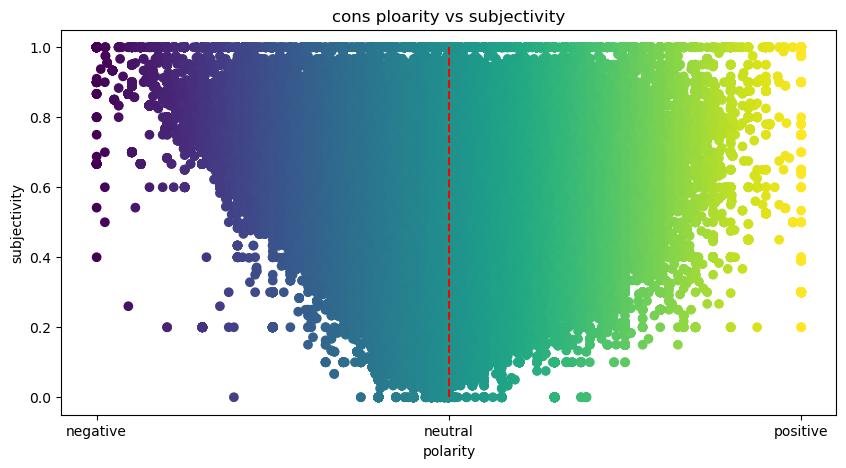

In [20]:
plot_pol_vs_sub('c_polarity' , 'c_subjectivity' , 'cons')

**Findings:**

* It is not surprising to see the polarity of Pro mostly falls in the positive part because we know these are the nice things employees say about this company.
* It is surprising to see even in the Con column, half of the data points' polarity falls on the positive side. This is strong evidence that most employees love this company and they don't have many complaints.

In [21]:
df_new.to_csv('/kaggle/working/df_new.csv')